# Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('default_payment_dataset.csv', sep=';')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


<b>Descriptions:</b>
<li>Sex: 1=male, 2=female</li>
<li>Education: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown</li>
<li>Marital status: 1=married, 2=single, 3=others</li>
<li>Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)</li>
<li>Default payment (1=yes, 0=no)</li>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

<b>No Null value found</b><br>

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [7]:
bill_cat=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
paybill_cat=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[bill_cat].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000
mean,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000
std,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234
min,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000
25%,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000
50%,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000
75%,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000
max,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000


In [8]:
df[paybill_cat].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


<b>
<li>
    Q3 value (75%) has a big gap with the max value for every BILL_AMT and PAY_AMT feature (outliers indication). There is also a big gap between <b>min and max</b> value of every BILL_AMT and PAY_AMT feature
</li>
</b>

In [9]:
categoricals=['SEX', 'EDUCATION', 'MARRIAGE']
for i in categoricals:
    print(f'Value count kolom {i}:')
    print(df[i].value_counts())
    print()

Value count kolom SEX:
2    12759
1     8241
Name: SEX, dtype: int64

Value count kolom EDUCATION:
2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64

Value count kolom MARRIAGE:
2    11184
1     9561
3      219
0       36
Name: MARRIAGE, dtype: int64



<b>
    As for the SEX feature, all the values are corresponding with the available category<br>
    However, there are some values on EDUCATION and MARRIAGE features that are not corresponding with the available category (Ex: 0 in MARRIAGE and EDUCATION), 
</b>

In [10]:
df['EDUCATION']= df['EDUCATION'].apply(lambda x: 4 if x==0 or x == 5 or x == 6 else x)
df['MARRIAGE']= df['MARRIAGE'].apply(lambda x: 3 if x==0 else x)

# Univariate Analysis

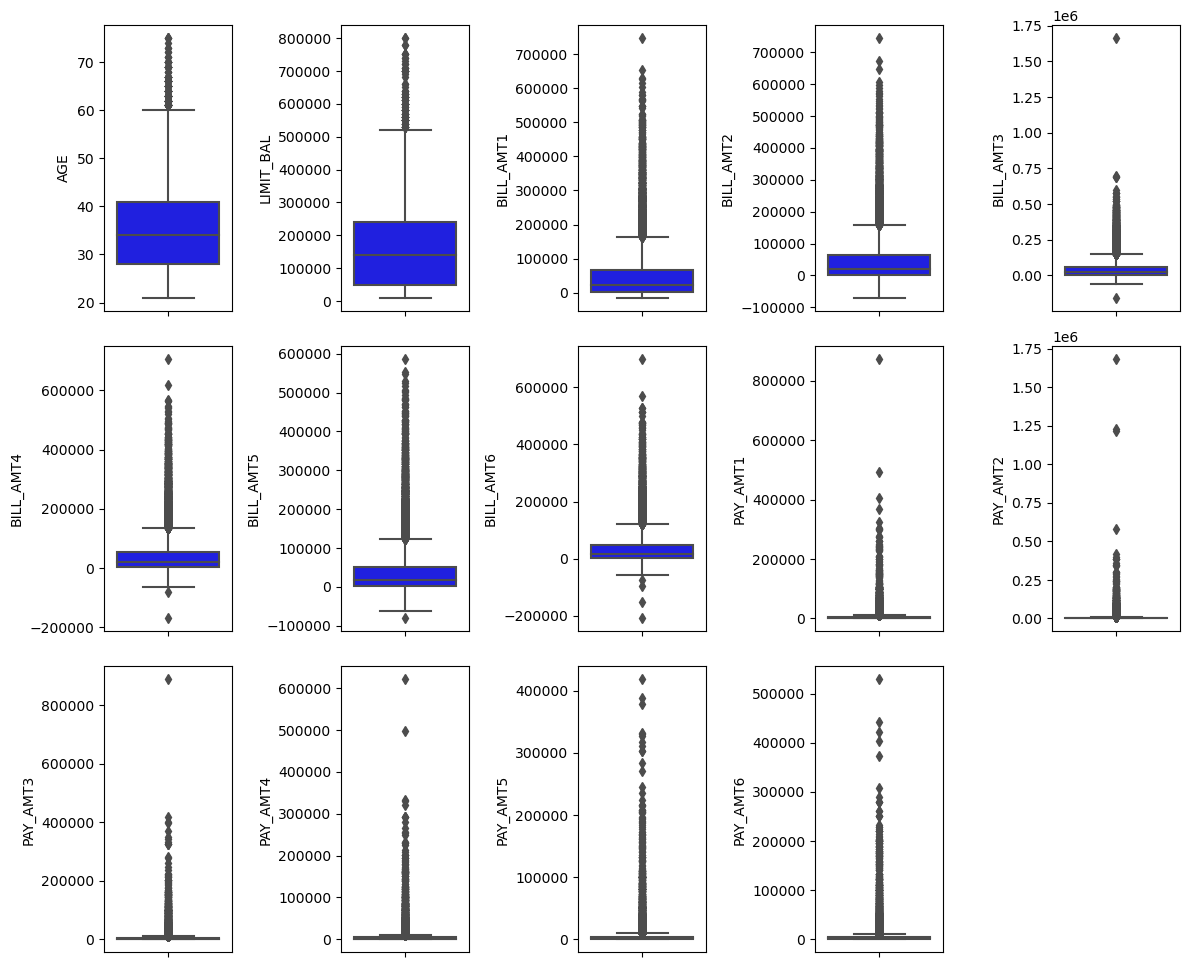

In [11]:
account=['AGE','LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
         'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(12,45))
for i in range(0, len(account)):
    plt.subplot(len(account), 5,i+1)
    sns.boxplot(y=df[account[i]], color='blue', orient='v')
    plt.tight_layout()

**Outliers indication for all BILL_AMT and PAY_AMT features**

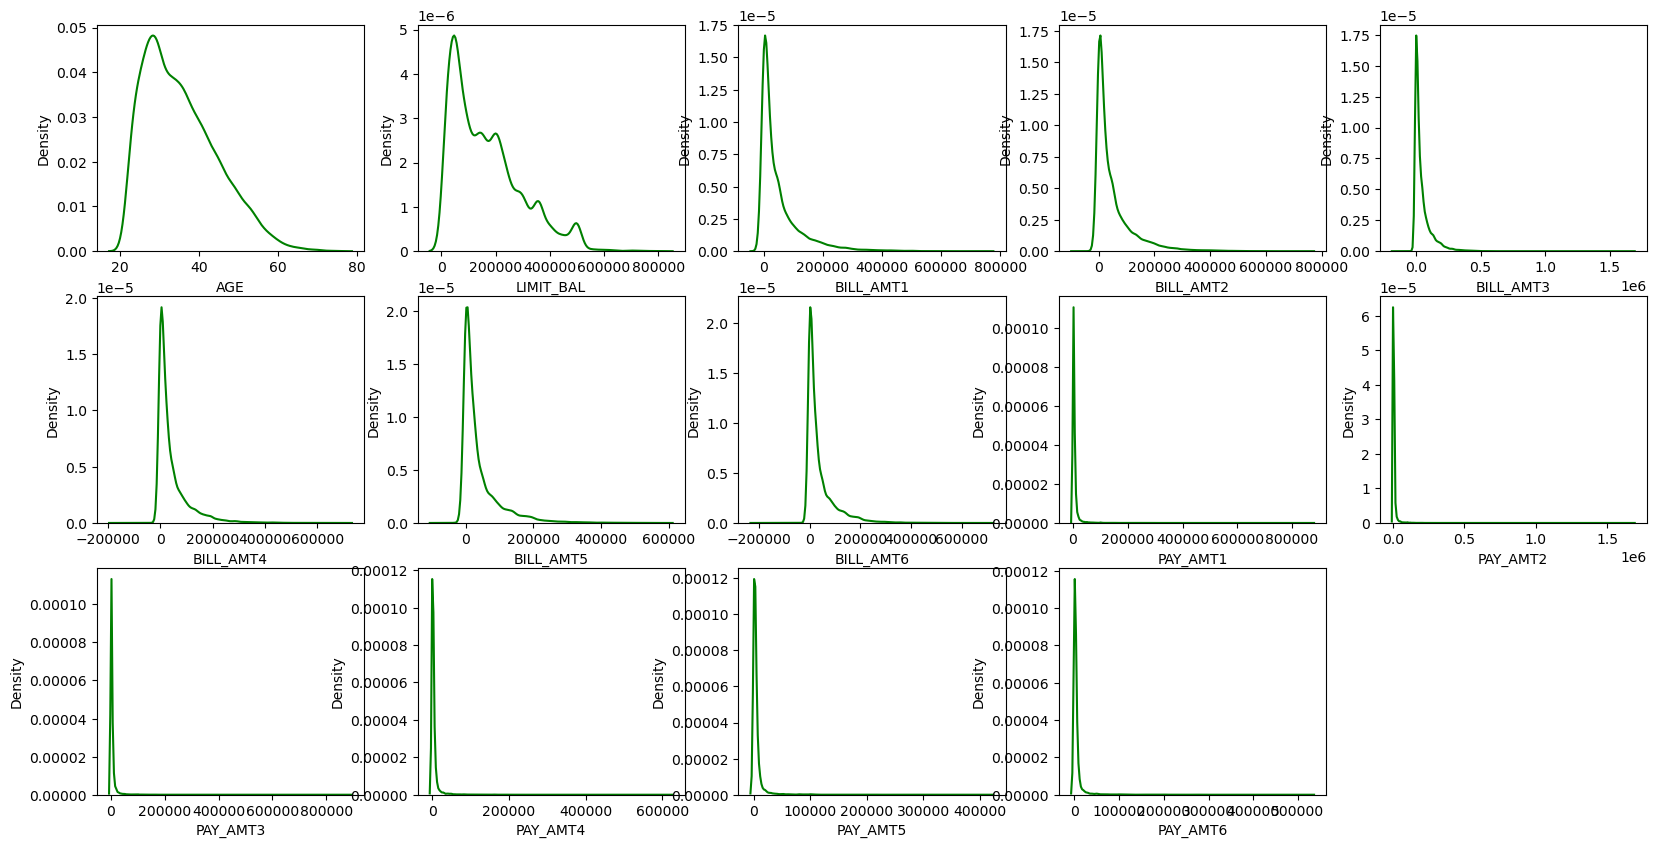

In [12]:
plt.figure(figsize=(20,10))
for i in range(len(account)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[account[i]], color='green')

**There are no numerical features with normal distribution on the dataset**

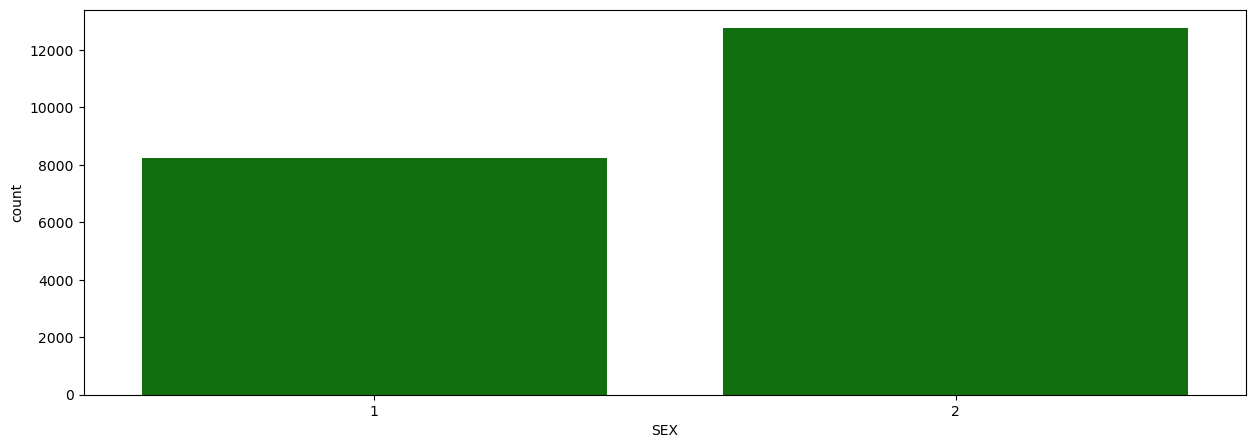

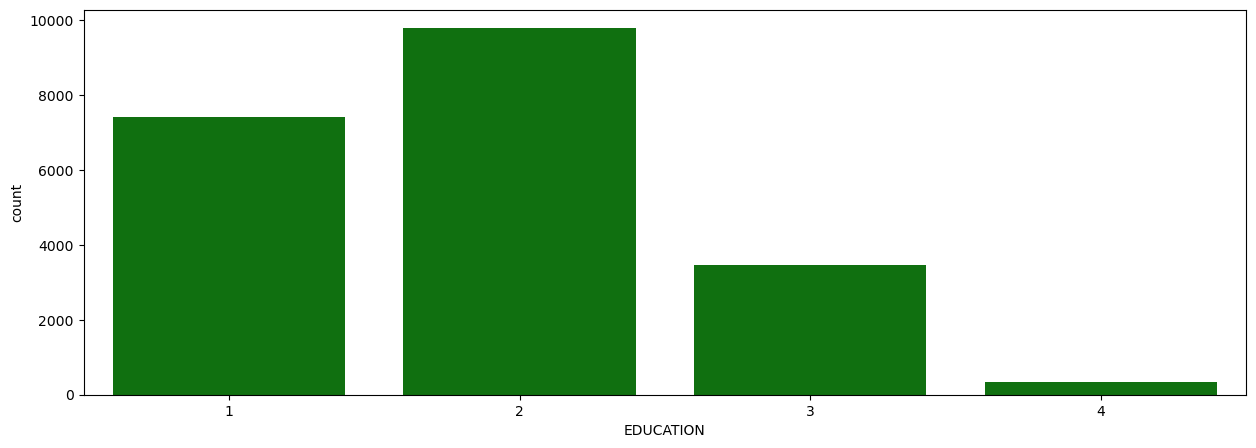

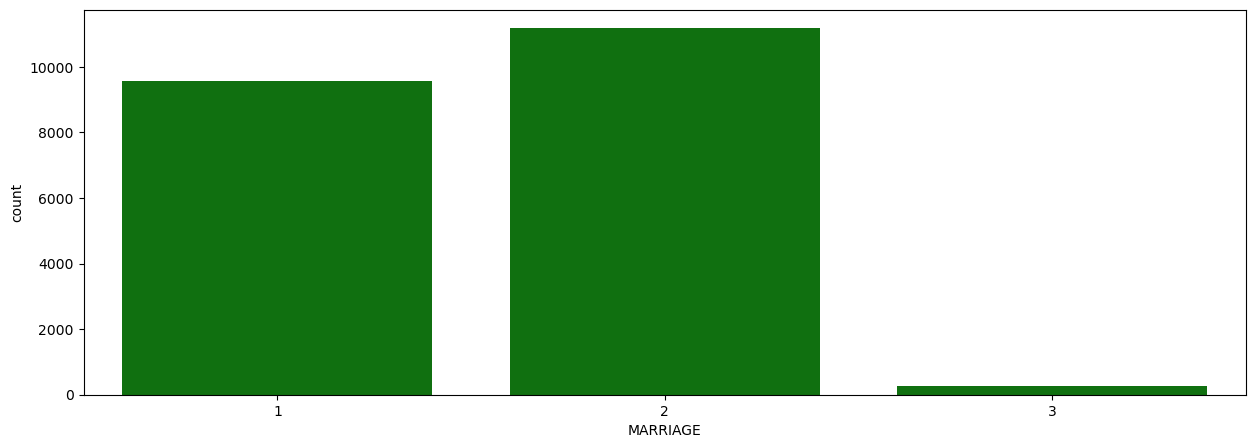

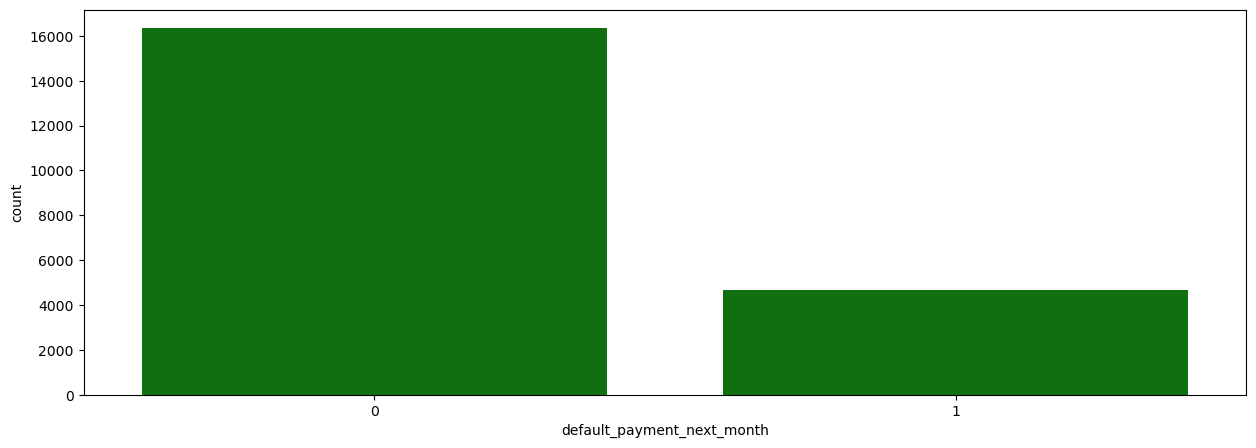

In [13]:
categoricals_demography = ['SEX', 'EDUCATION', 'MARRIAGE', 'default_payment_next_month']
categoricals_payment = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i in range(len(categoricals_demography)):
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[categoricals_demography[i]], data=df, color='green')

<li>Most of the customers are Female and less than 30 years old</li>
<li>Most of the customers are coming from the undergraduate background of education</li>
<li>The marital status from most of the customers is single</li>
<li>Based on the historical data given, most of the customers already paid their bills duly</li>

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

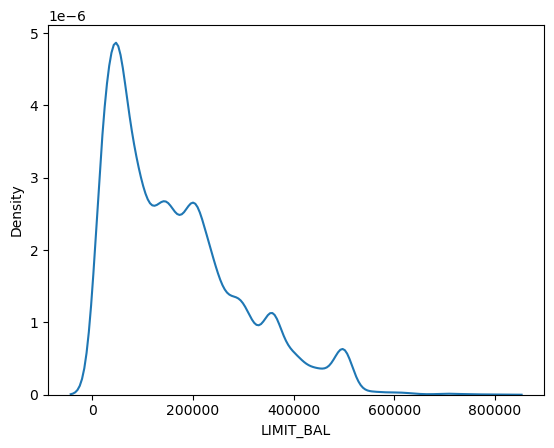

In [14]:
sns.kdeplot(data=df, x='LIMIT_BAL')

**Most of the customers have their credit card limit below NTD 200.000**

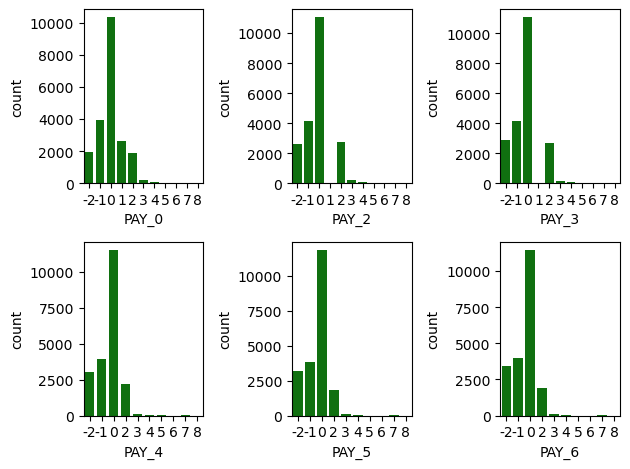

In [15]:
for i in range(len(categoricals_payment)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categoricals_payment[i]], color='green', orient='h')
    plt.tight_layout()

**As for the PAY_N features have a skewed distribution, and most of the customers use the revolving credit**

# Multivariate Analysis

<AxesSubplot:>

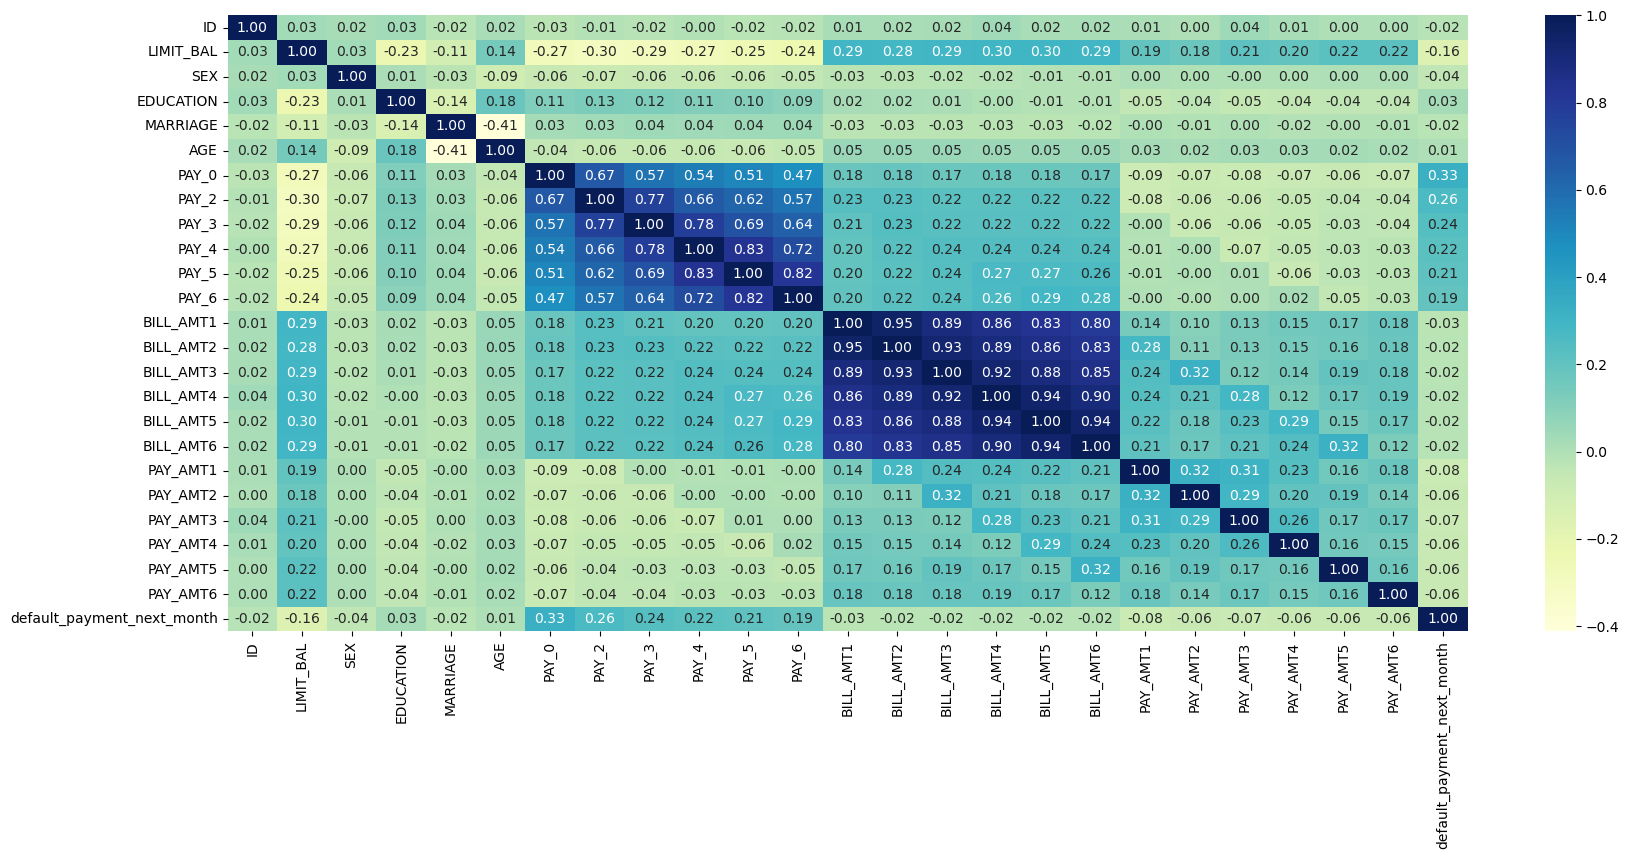

In [16]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

The target feature (default_payment_next_month) positively correlates with all the PAY_N features. **It means the longer the customers delay their payment, the more likely they will default for the next month**

On the other hand, the target feature negatively correlates with the LIMIT_BAL feature. **It means the higher the customer's limit, the more unlikely they will default for the next month**

# Data Preprocessing

## Handle Duplicate Data

In [22]:
df['ID'].duplicated().sum()

0

**No duplicate data found**

## One Hot Enconding

In [18]:
def onehot_encode(df, col_dict):
    for col, prefix in col_dict.items():
        dummies = pd.get_dummies(df[col], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1)
    
    return df

df = onehot_encode(
    df,
    {
        'EDUCATION': 'education',
        'MARRIAGE': 'marriage',
        'SEX':'sex'
    }
)

## Feature Extraction

In [23]:
df['is_default_ever']=df.apply(lambda x: 1 if x['PAY_0'] >= 1 else 1 if x['PAY_2'] >=1 else 1 if x['PAY_3'] >= 1 else 1 if x['PAY_4'] >= 1 else 1 if x['PAY_5'] >= 1 else 1 if x['PAY_6'] >= 1 else 0, axis=1)

df['never_default_0'] = df.apply(lambda x: 0 if x['PAY_0'] >= 1 else 1, axis=1)
df['never_default_2'] = df.apply(lambda x: 0 if x['PAY_2'] >= 1 else 1, axis=1)
df['never_default_3'] = df.apply(lambda x: 0 if x['PAY_3'] >= 1 else 1, axis=1)
df['never_default_4'] = df.apply(lambda x: 0 if x['PAY_4'] >= 1 else 1, axis=1)
df['never_default_5'] = df.apply(lambda x: 0 if x['PAY_5'] >= 1 else 1, axis=1)
df['never_default_6'] = df.apply(lambda x: 0 if x['PAY_6'] >= 1 else 1, axis=1)

df['is_never_default'] = df.apply(lambda x: 1 if (x['never_default_0'] + x['never_default_2'] + x['never_default_3'] + x['never_default_4'] + x['never_default_5'] + x['never_default_6']) == 6 else 0, axis=1)

df['is_default_in_last_three_months'] = df.apply(lambda x: 1 if x['PAY_0'] >=1 and x['PAY_2'] >= 1 and x['PAY_3'] >=1 else 0, axis=1)
df.sample(5)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,sex_2,is_default_ever,never_default_0,never_default_2,never_default_3,never_default_4,never_default_5,never_default_6,is_never_default,is_default_in_last_three_months
14208,14419,20000,40,2,2,4,3,2,0,17761,...,1,1,0,0,0,0,0,1,0,1
11305,9583,30000,23,2,2,0,0,2,2,15955,...,1,1,0,0,1,1,0,0,0,0
1499,27250,50000,30,1,-1,-1,-1,0,0,0,...,0,1,0,1,1,1,1,1,0,0
9387,26927,200000,38,0,0,0,0,0,0,101254,...,0,0,1,1,1,1,1,1,1,0
3381,20625,120000,32,-1,-1,-1,-1,-1,-1,1166,...,0,0,1,1,1,1,1,1,1,0


In [30]:
df = df.drop(columns=['ID', 'never_default_0', 'never_default_2', 'never_default_3', 'never_default_4', 
                     'never_default_5', 'never_default_6'])

## Data Transformation

In [31]:
X = df.drop(columns=['default_payment_next_month'])
y = df['default_payment_next_month']

In [32]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)

X.sample(5)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,education_3,education_4,marriage_1,marriage_2,marriage_3,sex_1,sex_2,is_default_ever,is_never_default,is_default_in_last_three_months
18557,-0.133487,-0.158761,0.009963,0.106127,0.137542,0.186140,0.228619,0.250674,1.344995,1.390188,...,-0.444681,-0.126159,1.093811,-1.067410,-0.11087,-0.803677,0.803677,-0.712949,0.712949,-0.317857
8595,-0.133487,-1.027721,0.009963,0.106127,0.137542,0.186140,0.228619,0.250674,-0.206932,-0.231476,...,-0.444681,-0.126159,-0.914235,0.936847,-0.11087,-0.803677,0.803677,-0.712949,0.712949,-0.317857
15451,-0.986451,-1.027721,0.009963,0.106127,0.137542,1.892359,1.980812,1.987442,-0.416130,-0.406640,...,-0.444681,-0.126159,-0.914235,0.936847,-0.11087,-0.803677,0.803677,1.402626,-1.402626,-0.317857
10148,-0.831366,3.317079,0.009963,0.106127,1.806161,1.892359,3.733004,3.724210,-0.056521,0.024928,...,2.248802,-0.126159,1.093811,-1.067410,-0.11087,-0.803677,0.803677,1.402626,-1.402626,-0.317857
6309,0.331766,0.167099,0.009963,0.106127,0.137542,0.186140,0.228619,0.250674,1.234106,1.263834,...,-0.444681,-0.126159,-0.914235,0.936847,-0.11087,1.244281,-1.244281,-0.712949,0.712949,-0.317857


## Data Split (80/20)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
df.sample(5)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,education_3,education_4,marriage_1,marriage_2,marriage_3,sex_1,sex_2,is_default_ever,is_never_default,is_default_in_last_three_months
2621,270000,37,-1,-1,-1,0,-1,-1,396,396,...,0,0,1,0,0,1,0,0,1,0
10488,470000,33,-2,-2,-2,-2,-1,-1,0,0,...,0,0,0,1,0,0,1,0,1,0
12936,100000,40,-2,-1,2,2,-2,-1,3234,6163,...,1,0,1,0,0,0,1,1,0,0
679,210000,31,2,-1,-1,0,-1,-1,1172,380,...,0,0,0,1,0,1,0,1,0,0
19071,150000,49,0,0,0,0,0,0,151822,86002,...,0,0,0,1,0,1,0,0,1,0


## Handling Outliers

In [36]:
X_y_train = X_train.join(y_train)

z_scores = np.abs((X_y_train - X_y_train.mean()) / X_y_train.std())

# tentukan threshold untuk mengidentifikasi outlier
threshold = 3

# buat mask untuk setiap kolom untuk mengidentifikasi outlier
mask = z_scores > threshold

# buat dataframe baru dengan hanya mengambil baris yang tidak memiliki outlier
X_y_no_outliers = X_y_train.loc[~mask.any(axis=1)]

# periksa jumlah data yang dihapus dan yang tersisa
print('Original Train Data:', len(X_y_train))
print('Train Data without outliers:', len(X_y_no_outliers))

Original Train Data: 16800
Train Data without outliers: 13275


In [37]:
X_train = X_y_no_outliers.drop(columns=['default_payment_next_month'])
y_train = X_y_no_outliers['default_payment_next_month']

## Handling Imbalance Class

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

print(X_train.shape)
print(X_train.shape)
print(X_train_oversampled.shape)
print(y_train_oversampled.shape)

y_train_oversampled.value_counts()

(13275, 32)
(13275, 32)
(21632, 32)
(21632,)


0    10816
1    10816
Name: default_payment_next_month, dtype: int64

# Data Model Analysis

**The purpose of this step is to determine which of the Classification model is the best for this problem**

In [44]:
def CMatrix(CM, label=['pay','default_payment_next_month']):
    df = pd.DataFrame(data=CM, index=label, columns=label)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

metrics = pd.DataFrame(
    index=['accuracy','precision','recall'],
    columns=['LogisticReg','ClassTree', 'NaiveBayes', 'RandomForest'] 
  )

## DMA - Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(n_jobs=-1, random_state=42)
logistic_regression.fit(X_train_oversampled, y_train_oversampled)

y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,pay,default_payment_next_month,Total
TRUE,,,
pay,2323,914,3237
default_payment_next_month,312,651,963
Total,2635,1565,4200


## DMA - Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=42)
class_tree.fit(X_train_oversampled, y_train_oversampled)

y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,pay,default_payment_next_month,Total
TRUE,,,
pay,2463,774,3237
default_payment_next_month,455,508,963
Total,2918,1282,4200


## DMA - Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

NBC = GaussianNB()
NBC.fit(X_train_oversampled, y_train_oversampled)

y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,pay,default_payment_next_month,Total
TRUE,,,
pay,1364,1873,3237
default_payment_next_month,179,784,963
Total,1543,2657,4200


## DMA - Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train_oversampled, y_train_oversampled)
y_pred_test = rf.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,pay,default_payment_next_month,Total
TRUE,,,
pay,2822,415,3237
default_payment_next_month,494,469,963
Total,3316,884,4200


## DMA Charts - Overview

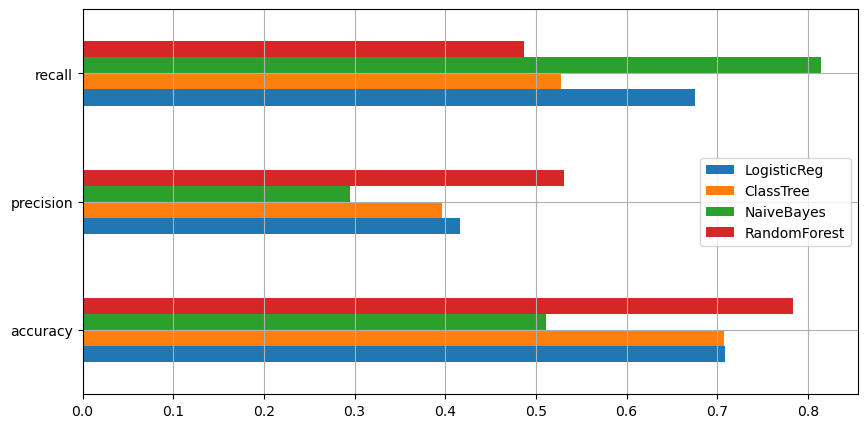

In [50]:
100*metrics

fig, ax = plt.subplots(figsize=(10,5))
metrics.plot(kind='barh', ax=ax)    
    
ax.grid()

From DMA Charts above, it can be seen that **even though Logistic Regression recall's score is below Naive Bayes, the accuracy of Logistic Regression is still better**. Therefore, the Logistic Regression will be used in this case

## DMA Charts - Precision Recall Curve

In [51]:
precision_nb, recall_nb, threshold_nb = precision_recall_curve(y_true=y_test,
                                                              probas_pred=NBC.predict_proba(X_test)[:,1])
precision_lr, recall_lr, threshold_lr = precision_recall_curve(y_true=y_test,
                                                              probas_pred=logistic_regression.predict_proba(X_test)[:,1])
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_true=y_test,
                                                              probas_pred=rf.predict_proba(X_test)[:,1])

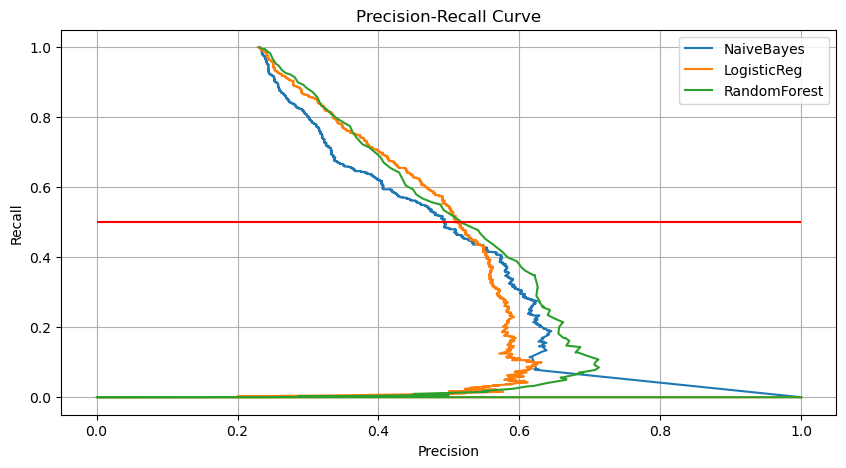

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(precision_nb, recall_nb, label='NaiveBayes')
ax.plot(precision_lr, recall_lr, label='LogisticReg')
ax.plot(precision_rf, recall_rf, label='RandomForest')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, colors='red')
ax.legend()
ax.grid()

The precision-recall curve above tells that by giving the model threshold of 0.5, the **Logistic Regression Model is still giving the best output of recall** compared to the Naive Bayes and Random Forest model.

## DMA Charts - Logistic Precision Recall Curve

Text(0.5, 0.2, 'Accuracy: 0.71')

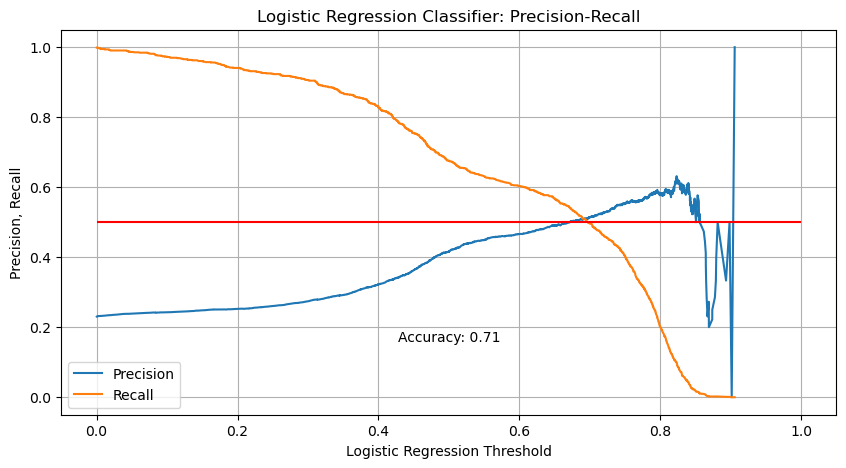

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(threshold_lr, precision_lr[1:], label='Precision')
ax.plot(threshold_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Logistic Regression Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines(y=0.5, xmin=0, xmax=1, colors='red')
ax.legend()
ax.grid()

accuracy = lr.score(X_test, y_test)
plt.text(0.5, 0.2, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=plt.gca().transAxes)

Specifically for Logistic Regression, by giving the threshold of 0.5, **the model can give a score above 0.6 (60%) with the accuracy score of 0.71 (71%)**

# Fitting Model - Logistic Regression

In [41]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_validate

def eval_classification(model, x_tra, x_tes, y_tra, y_tes, threshold):
    #y_pred = model.predict(x_tes)
    y_pred_train = model.predict(x_tra)
    y_pred_proba_train = model.predict_proba(x_tra)
    
    y_pred_proba = model.predict_proba(x_tes)
    
    threshold = threshold
    y_pred = (y_pred_proba[:, 1] >= threshold).astype('int')
    
    print(classification_report(y_tes, y_pred))
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_tes, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_tes, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_tes, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_tes, y_pred))
    print("roc_auc (test-proba): %.4f" % roc_auc_score(y_tes, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.4f" % roc_auc_score(y_tra, y_pred_proba_train[:, 1]))
    
    #Plotting Confusion Matrix
    conf_matrix = confusion_matrix(y_pred, y_tes)
    sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='d',
               xticklabels=['Non-default','Default'],
               yticklabels=['Non-default','Default'],
               linewidths=.5
               )

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3237
           1       0.42      0.68      0.52       963

    accuracy                           0.71      4200
   macro avg       0.65      0.70      0.65      4200
weighted avg       0.77      0.71      0.73      4200

Accuracy (Test Set): 0.71
Precision (Test Set): 0.42
Recall (Test Set): 0.68
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.7483
roc_auc (train-proba): 0.7260


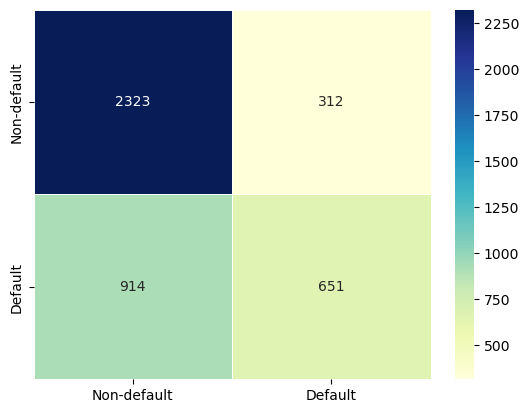

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_oversampled, y_train_oversampled)

eval_classification(lr, X_train_oversampled, X_test, y_train_oversampled, y_test, 0.5)

The confusion matrix above describes using the Logistic Regression without any hyperparameters resulting in a **recall score of 68%**and the **accuracy score of 71%** with a threshold of 0.5. It means the model can identify 68% correct positive value from the actual observations

# Tuning Hyperparameters

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

hyperparameter_space = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=1),
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': np.linspace(100, 2000, 10),
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'warm_start': [True, False],
    'l1_ratio': uniform(loc=0, scale=1),
    'tol': uniform(loc=0, scale=0.1)
}

random_search = RandomizedSearchCV(
    lr, 
    hyperparameter_space, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)

random_search.fit(X_train_oversampled, y_train_oversampled)
print('Best parameters:', random_search.best_params_)

Best parameters: {'C': 0.3630822963986351, 'fit_intercept': False, 'l1_ratio': 0.6075552222935728, 'max_iter': 1577.7777777777778, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.09336918237598746, 'warm_start': True}


              precision    recall  f1-score   support

           0       0.89      0.70      0.78      3237
           1       0.41      0.70      0.51       963

    accuracy                           0.70      4200
   macro avg       0.65      0.70      0.65      4200
weighted avg       0.78      0.70      0.72      4200

Accuracy (Test Set): 0.70
Precision (Test Set): 0.41
Recall (Test Set): 0.70
F1-Score (Test Set): 0.51
roc_auc (test-proba): 0.7477
roc_auc (train-proba): 0.7239


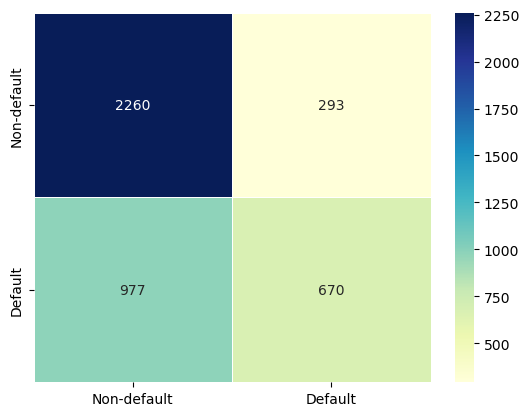

In [55]:
lr = LogisticRegression(
    n_jobs=-1, 
    random_state=42,
    C=0.3630822963986351,
    fit_intercept=False,
    l1_ratio=0.6075552222935728,
    max_iter=1578,
    multi_class='multinomial',
    penalty='l1',
    solver='saga',
    tol=0.09731103492701043,
    warm_start=True
    
)
lr.fit(X_train_oversampled, y_train_oversampled)

eval_classification(lr, X_train_oversampled, X_test, y_train_oversampled, y_test, 0.5)

By giving the model some hyperparameters, even though the accuracy **slightly decreases to 0.70**,  the recall score is also **increased slightly to 0.70**, which provides a good score compared to using any hyperparameters.

# Gain and Lift Analysis

## Gain Chart

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.845,0.998,0.987,420.0,249.0,171.0,96.3,420,59.286,420.0,249.0,420,171.0,10.0,25.857,43.614,5.283,20.574,2.586
1,2,0.726,0.845,0.777,420.0,202.0,218.0,96.3,420,48.095,840.0,451.0,840,389.0,20.0,46.833,87.227,12.017,34.816,2.342
2,3,0.599,0.726,0.669,420.0,133.0,287.0,96.3,123,31.667,1260.0,584.0,963,676.0,30.0,60.644,100.000,20.884,39.760,2.021
3,4,0.495,0.598,0.537,420.0,91.0,329.0,96.3,0,21.667,1680.0,675.0,963,1005.0,40.0,70.093,100.000,31.047,39.046,1.752
4,5,0.440,0.495,0.466,420.0,61.0,359.0,96.3,0,14.524,2100.0,736.0,963,1364.0,50.0,76.428,100.000,42.138,34.290,1.529
5,6,0.390,0.440,0.414,420.0,59.0,361.0,96.3,0,14.048,2520.0,795.0,963,1725.0,60.0,82.555,100.000,53.290,29.265,1.376
6,7,0.333,0.390,0.362,420.0,51.0,369.0,96.3,0,12.143,2940.0,846.0,963,2094.0,70.0,87.850,100.000,64.690,23.160,1.255
7,8,0.257,0.332,0.297,420.0,37.0,383.0,96.3,0,8.810,3360.0,883.0,963,2477.0,80.0,91.693,100.000,76.521,15.172,1.146
8,9,0.134,0.256,0.201,420.0,46.0,374.0,96.3,0,10.952,3780.0,929.0,963,2851.0,90.0,96.469,100.000,88.075,8.394,1.072
9,10,0.000,0.134,0.057,420.0,34.0,386.0,96.3,0,8.095,4200.0,963.0,963,3237.0,100.0,100.000,100.000,100.000,0.000,1.000


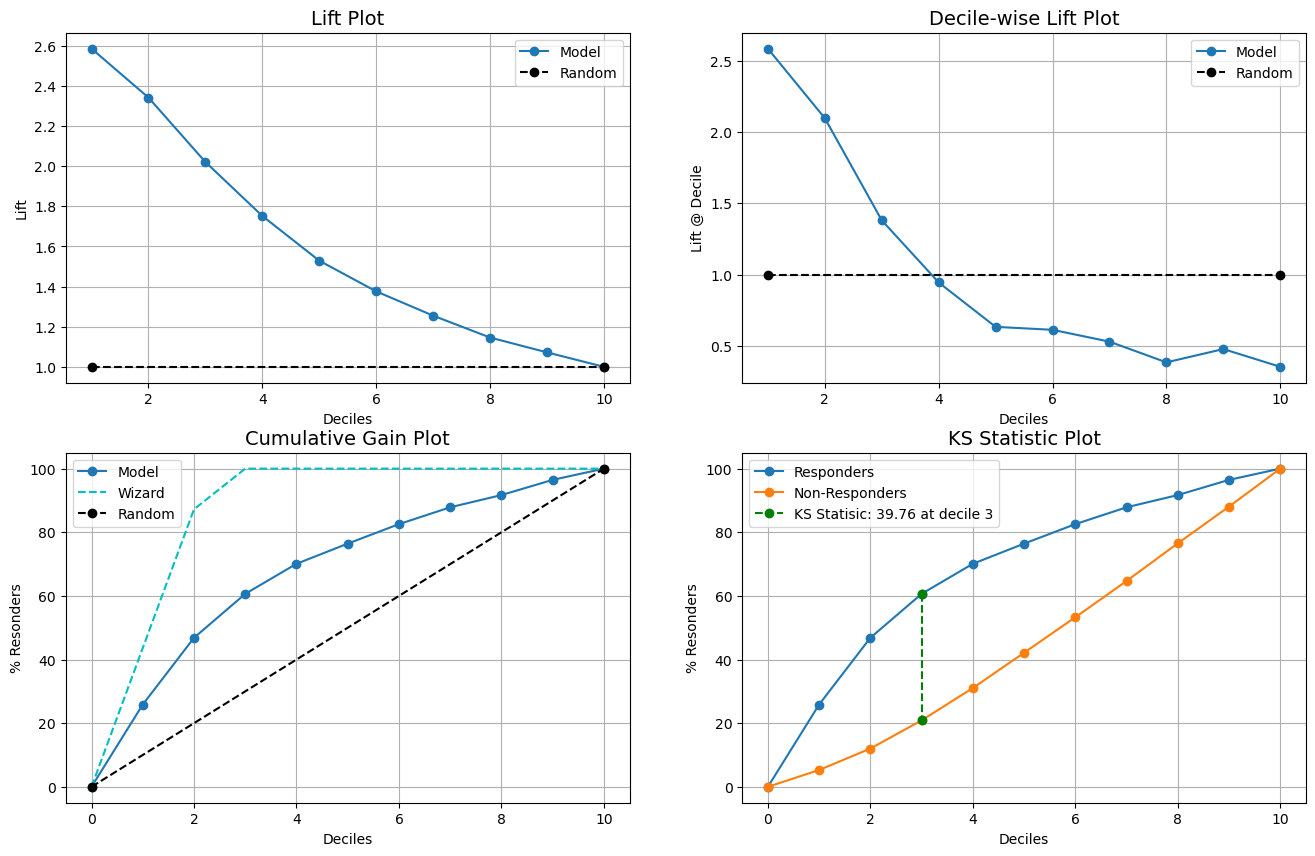

In [59]:
import kds
prob_glm = lr.predict_proba(X_test)
max_prob_glm = round(pd.DataFrame(np.amax(prob_glm, axis=1), columns = ['prob_glm']),2)
max_prob_glm['Decile_rank_glm'] = pd.cut(max_prob_glm['prob_glm'], 10, labels = np.arange(10,0, -1))

kds.metrics.report(y_test, prob_glm[:,1])

**Gain Analysis**<br>
Based on the Gain Plot, the model can predict 70% of customers with a high probability of becoming defaulters at 40% of the total customers on the whole observation. <br>

**Lift Analysis**<br>
The Lift Plot above informs that by targeting 40% of customers with a high probability of becoming defaulters, the model can predict 1.75 times better than selecting 40% of random customers. <br>

**Conclusion**<br>
As for both **Gain** and **Lift** plots already above the random line, business-wise, the model can well predict the potential defaulters by using fewer resources compared to predicting defaulters randomly.